In [3]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [7]:
label = ["rock", "paper", "scissors"]

In [8]:
input_array  = []
output_array = []

In [5]:
datadir = "train/"

for i in label:
    path = os.path.join(datadir, i)
    print(path)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        
        input_array.append(img_resized.flatten()) #menampung gambar dalam array yang sesuai dengan label
        output_array.append(label.index(i)) #melabeli setiap gambar berdasarkan direktori.
    print(f'load label:{i} berhasil')

train/rock
load label:rock berhasil
train/paper
load label:paper berhasil
train/scissors
load label:scissors berhasil


In [6]:
np_input_array = np.array(input_array)
np_output_array = np.array(output_array)

df=pd.DataFrame(np_input_array) #dataframe
df['label'] = np_output_array

df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,label
0,0.127778,0.483007,0.187582,0.120261,0.477451,0.180392,0.124183,0.479412,0.187582,0.131373,...,0.160458,0.471895,0.154248,0.154902,0.464706,0.147059,0.152941,0.462745,0.141830,0
1,0.135294,0.462745,0.169608,0.126797,0.454575,0.162745,0.135294,0.461438,0.162745,0.139542,...,0.133333,0.488235,0.166667,0.133987,0.483987,0.160784,0.135621,0.483987,0.163399,0
2,0.158497,0.521569,0.203922,0.157190,0.521569,0.203922,0.153595,0.521895,0.203922,0.159150,...,0.168954,0.542157,0.214706,0.174510,0.539542,0.221895,0.180392,0.548693,0.229085,0
3,0.136601,0.456209,0.149020,0.131699,0.456209,0.148366,0.137908,0.462092,0.152614,0.141830,...,0.151961,0.485948,0.165686,0.149020,0.480065,0.154902,0.162092,0.482353,0.169935,0
4,0.194118,0.566340,0.248693,0.193137,0.571895,0.248693,0.186601,0.570915,0.245425,0.192157,...,0.188235,0.598039,0.264706,0.196078,0.596078,0.266667,0.188235,0.598039,0.266667,0


In [7]:
x=df.iloc[:,:-1] #input data 
x.shape

(2188, 67500)

In [8]:
y=df.iloc[:,-1] #output data
y.shape

(2188,)

In [9]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid={
    'C':[10,100],
    'gamma':[0.1,1],
    'kernel':['poly']}

svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid, verbose=4, n_jobs=-1, cv=2)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.4,random_state=42, stratify=y)

#melatih model untuk klasifikasi gambar
model.fit(x_train,y_train)

print('Model sedang belajar..........')

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Model sedang belajar..........


In [4]:
print("selesai")

selesai


In [12]:
model.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}

In [23]:
import joblib
fl = 'model/'
joblib.dump(fl, 'svm.pkl')

['svm.pkl']

In [16]:
y_pred=model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
print(f"Akurasi model: {accuracy_score(y_pred,y_test)*100}%")

Akurasi model: 94.63470319634703%


Gambar URL : https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Rock-paper-scissors_(scissors).png/600px-Rock-paper-scissors_(scissors).png


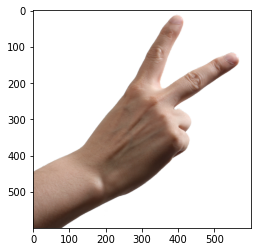

rock = 3.466061034508659e-09%
paper = 2.4615570116859124e-09%
scissors = 99.99999999407238%
Hasil prediksi : scissors


In [18]:
url=input('Gambar URL :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)

for ind,val in enumerate(label):
    print(f'{val} = {probability[0][ind]*100}%')
print("Hasil prediksi : "+ label[model.predict(l)[0]])

In [10]:
import joblib

model_load = joblib.load("svm.pkl")
model_load.

'model/'

Gambar URL : https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Rock-paper-scissors_(scissors).png/600px-Rock-paper-scissors_(scissors).png


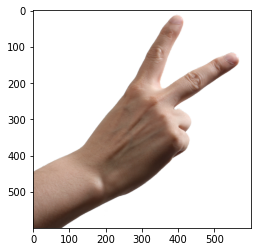

AttributeError: 'str' object has no attribute 'predict'

In [9]:
url=input('Gambar URL :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]

print("Hasil prediksi : "+ label[model_load.predict(l)[0]])

In [18]:
import cv2

In [19]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("tidak dapat buka camera")
    exit()

while True:
    ret, frame = cap.read()
    font = cv2.FONT_HERSHEY_SIMPLEX
    img_resize_opencv=resize(frame,(150,150,3))
    
    img_opencv_result_preproc=[img_resize_opencv.flatten()]
        
    cv2.putText(frame, 
                str(model_load.predict(img_opencv_result_preproc)), 
                (50, 50), 
                font, 1, 
                (0, 255, 255), 
                2, 
                cv2.LINE_4)
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

AttributeError: 'str' object has no attribute 'predict'